# How to get a Value Tile with Sorbetto? 

In [1]:
import matplotlib.pyplot as plt

In [2]:
from sorbetto.performance.two_class_classification_performance import (
    TwoClassClassificationPerformance,
)
from sorbetto.flavor.value_flavor import ValueFlavor
from sorbetto.tile.value_tile import ValueTile
from sorbetto.parameterization.parameterization_default import ParameterizationDefault

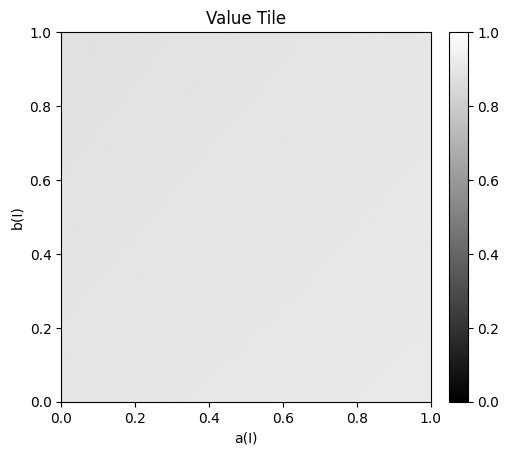

In [3]:
# Define the performance
proba_tn = 0.4
proba_fp = 0.045
proba_fn = 0.055
proba_tp = 0.5

# Create a performance object
performance = TwoClassClassificationPerformance(
    ptn=proba_tn, pfp=proba_fp, pfn=proba_fn, ptp=proba_tp
)

# Create the flavor object
flavor = ValueFlavor(performance=performance)

# Create the tile object
tile = ValueTile(
    parameterization=ParameterizationDefault(),
    flavor=flavor,
)

# Draw the Value Tile
fig, ax = tile.draw()
# ax.images[-1].set_clim(0.8, 1)
plt.show()

## Add annotations on the Value Tile

In [4]:
from sorbetto.annotation.annotation_text import AnnotationText
from sorbetto.annotation.annotation_isovalue_curves import AnnotationIsovalueCurves
from sorbetto.annotation.annotation_curve_fixed_class_priors import (
    AnnotationCurveFixedClassPriors,
)
from sorbetto.ranking.ranking_score import RankingScore

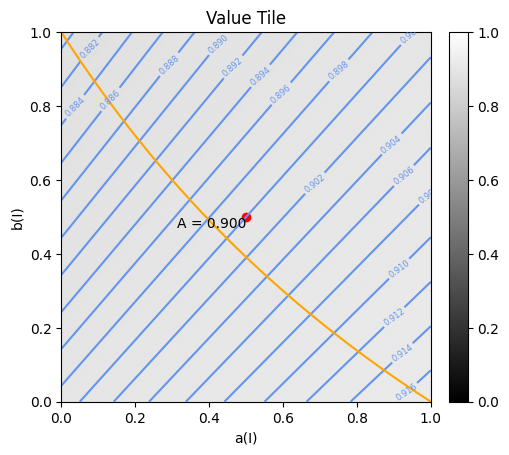

In [5]:
tile.clearAnnotations()

# Create annotation object to add a score
accuracy_score = RankingScore.getAccuracy()
accuracy_value = accuracy_score(performance)
accuracy_point_annotation = AnnotationText(
    location=accuracy_score, label=f"A = {accuracy_value:.3f}", color="red"
)
tile.appendAnnotation(accuracy_point_annotation)

# Create annotation object to add isovalue lines
isolines_annotation = AnnotationIsovalueCurves()
tile.appendAnnotation(isolines_annotation)

# Create annotation object to add the locus of performance orderings putting all no-skill performances on an equal footing
prior_pos = proba_tp + proba_fn
prior_annotation = AnnotationCurveFixedClassPriors(priorPos=prior_pos, c="orange")
tile.appendAnnotation(prior_annotation)

# Draw the Value Tile
fig, ax = tile.draw()
plt.show()